In [20]:
import numpy as np
import netCDF4
import csv
import pandas as pd
from scipy import interpolate, stats
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.ticker import ScalarFormatter

In [21]:
# These are the samples of Prochloroccocus, POC, PON, POP taken monthly from 10/20/2005 to 12/16/2022

In [22]:
filepath_pro = ('Prochlorococcus.xlsx')
filepath_poc = ('Particulate Organic Carbon.xlsx')
filepath_pop = ('Particulate Organic Phosphorus.xlsx')
filepath_pon = ('Particulate Organic Nitrogen (1).xlsx')
filepath_chl_a = ('Chlorophyll a (1).xlsx')

pro_df = pd.read_excel(filepath_pro, sheet_name = 'Data')
poc_df = pd.read_excel(filepath_poc, sheet_name = 'Data')
pop_df = pd.read_excel(filepath_pop, sheet_name = 'Data')
pon_df = pd.read_excel(filepath_pon, sheet_name = 'Data')
chl_a_df = pd.read_excel(filepath_chl_a, sheet_name = 'Data')

col_pro = pro_df.columns
col_poc = poc_df.columns
col_pop = pop_df.columns
col_pon = pon_df.columns
col_chl_a = chl_a_df.columns

print(col_pro)
print(col_poc)
print(col_pop)
print(col_pon)
print(col_chl_a)

print(pro_df.describe())
print(poc_df.describe())
print(pop_df.describe())
print(pon_df.describe())
print(chl_a_df.describe())




Index(['time', 'lat', 'lon', 'depth', 'prochlorococcus'], dtype='object')
Index(['time', 'lat', 'lon', 'depth', 'POC'], dtype='object')
Index(['time', 'lat', 'lon', 'depth', 'POP'], dtype='object')
Index(['time', 'lat', 'lon', 'depth', 'PON'], dtype='object')
Index(['depth', 'pigment14', 'pigment14_std'], dtype='object')
               time          lat          lon        depth  prochlorococcus
count   2290.000000  2290.000000  2290.000000  2290.000000      2290.000000
mean   41535.795130    31.721655   -64.177611    97.192358     30120.910044
std     1646.701772     0.426429     0.228894    72.230293     32858.429903
min    38666.247222    31.528000   -66.167000     1.500000        10.000000
25%    40156.377083    31.639000   -64.195000    39.200000      3061.250000
50%    41489.304861    31.662000   -64.171000    96.850000     20021.500000
75%    42935.379861    31.684000   -64.152000   141.000000     46254.250000
max    44574.429167    35.667000   -62.165000   254.800000    292753.

array([  3.4,   8.9,  20.8, ..., 160.4, 200.8, 250.3])

array([42039, 38529, 51405, ...,  6608,   997,    12])

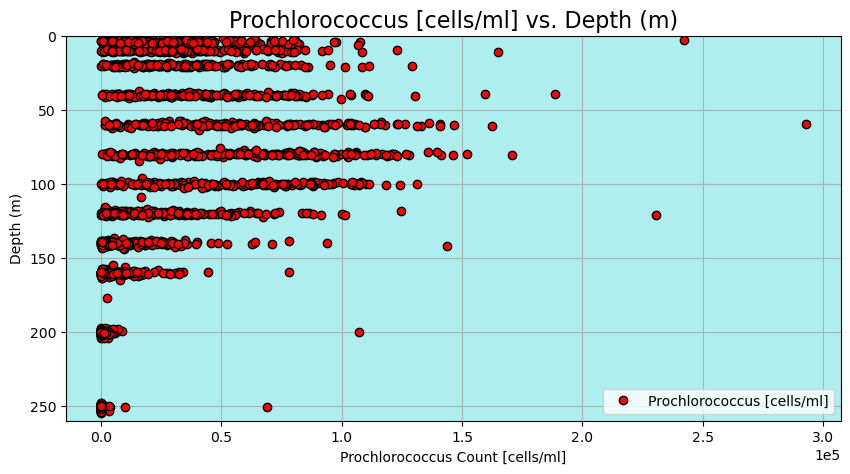

In [23]:
from matplotlib.axis import Axis 
pro_array_depth = pro_df.depth.values
display(pro_array_depth)

pro_array_pro = pro_df.prochlorococcus.values
display(pro_array_pro)

fig,axs = plt.subplots(figsize = (10,5))
axs.plot(pro_array_pro, pro_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'red', linestyle = 'None', label = 'Prochlorococcus [cells/ml]')
axs.invert_yaxis()
axs.grid()
axs.set_xlabel('Prochlorococcus Count [cells/ml]')
axs.set_ylabel('Depth (m)')
axs.set_title('Prochlorococcus [cells/ml] vs. Depth (m)', fontsize = 16)
axs.set_ylim(260,0)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
axs.set_facecolor('paleturquoise')
plt.show()

array([  3.4,   8.9,  20.8, ..., 159.2, 199.7, 253.3])

array([19.6 , 17.95, 19.39, ...,  8.33,  8.28,  9.39])

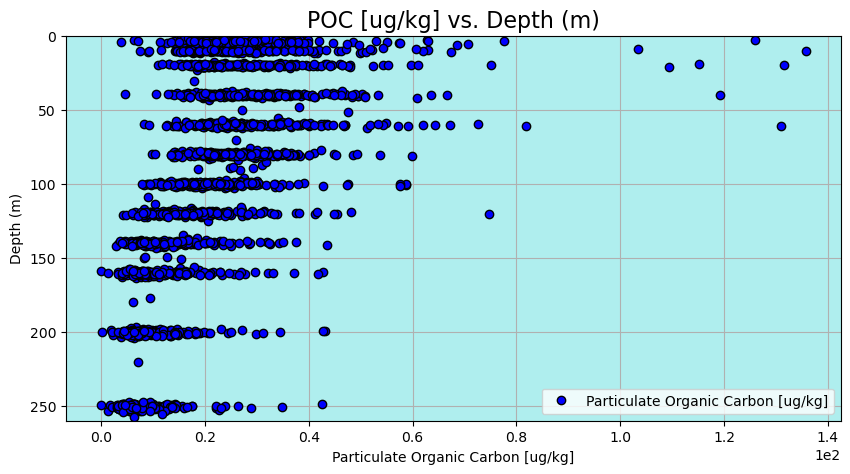

In [24]:
poc_array_depth = poc_df.depth.values
display(poc_array_depth)

pro_array_poc = poc_df.POC.values
display(pro_array_poc)

fig,axs = plt.subplots(figsize = (10,5))
axs.plot(pro_array_poc, poc_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'blue', linestyle = 'None', label = 'Particulate Organic Carbon [ug/kg]')
axs.invert_yaxis()
axs.grid()
axs.set_xlabel('Particulate Organic Carbon [ug/kg]')
axs.set_ylabel('Depth (m)')
axs.set_title('POC [ug/kg] vs. Depth (m)', fontsize = 16)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
axs.set_facecolor('paleturquoise')
axs.set_ylim(260,0)
plt.show()

array([  3.4,   8.9,  20.8, ..., 159.2, 199.7, 253.3])

array([5.18, 4.95, 5.18, ..., 2.39, 2.14, 1.72])

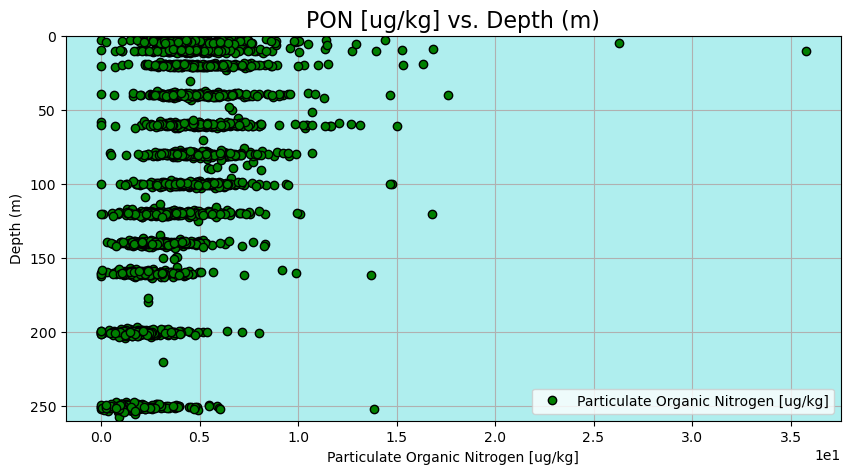

In [25]:
pon_array_depth = pon_df.depth.values
display(pon_array_depth)

pro_array_pon = pon_df.PON.values
display(pro_array_pon)

fig,axs = plt.subplots(figsize = (10,5))
axs.plot(pro_array_pon, pon_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'green', linestyle = 'None', label = 'Particulate Organic Nitrogen [ug/kg]')
axs.invert_yaxis()
axs.grid()
axs.set_xlabel('Particulate Organic Nitrogen [ug/kg]')
axs.set_ylabel('Depth (m)')
axs.set_title('PON [ug/kg] vs. Depth (m)', fontsize = 16)
axs.legend(loc = 'lower right')
axs.set_ylim(260,0)
axs.set_facecolor('paleturquoise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

array([  3.4,   8.9,  20.8, ..., 301.4, 403.5, 500.9])

array([0.008, 0.006, 0.009, ..., 0.004, 0.002, 0.002])

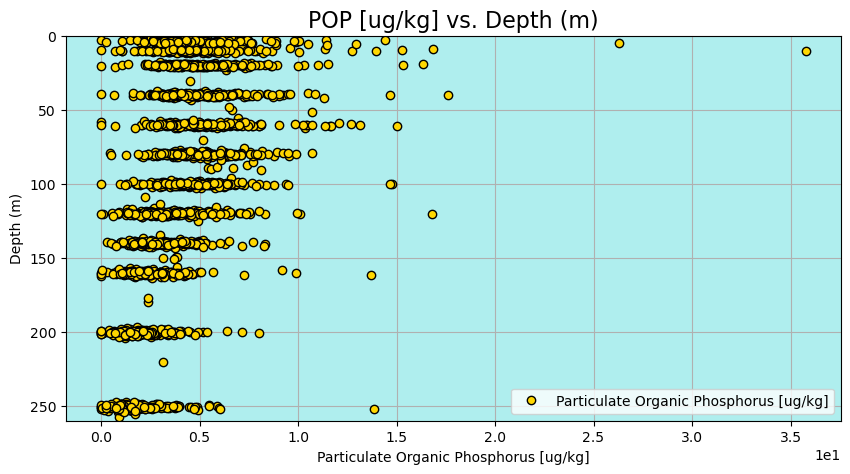

In [26]:
pop_array_depth = pop_df.depth.values
display(pop_array_depth)

pro_array_pop = pop_df.POP.values
display(pro_array_pop)

fig,axs = plt.subplots(figsize = (10,5))
axs.plot(pro_array_pon, pon_array_depth, color = 'k', lw = 2, marker = 'o', linestyle = 'None', markerfacecolor = 'gold', label = 'Particulate Organic Phosphorus [ug/kg]')
axs.invert_yaxis()
axs.grid()
axs.set_xlabel('Particulate Organic Phosphorus [ug/kg]')
axs.set_ylabel('Depth (m)')
axs.set_title('POP [ug/kg] vs. Depth (m)', fontsize = 16)
axs.legend(loc = 'lower right')
axs.set_ylim(260,0)
axs.set_facecolor('paleturquoise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

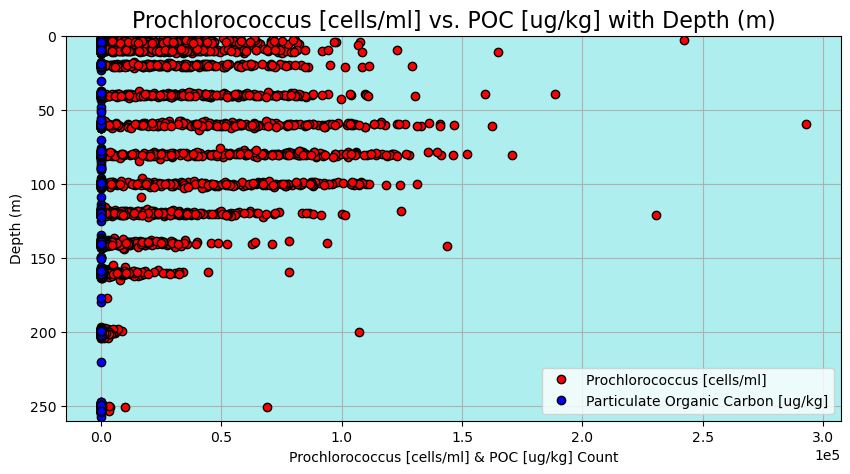

In [27]:
fig,axs = plt.subplots(figsize = (10,5))
axs.plot(pro_array_pro, pro_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'red', linestyle = 'None', label = 'Prochlorococcus [cells/ml]')
axs.plot(pro_array_poc, poc_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'blue', linestyle = 'None', label = 'Particulate Organic Carbon [ug/kg]')
axs.invert_yaxis()
axs.grid()
axs.set_ylim(260,0)
axs.set_xlabel('Prochlorococcus [cells/ml] & POC [ug/kg] Count', fontsize = 10)
axs.set_ylabel('Depth (m)', fontsize = 10)
axs.set_title('Prochlorococcus [cells/ml] vs. POC [ug/kg] with Depth (m)', fontsize = 16)
axs.set_facecolor('paleturquoise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
plt.show()

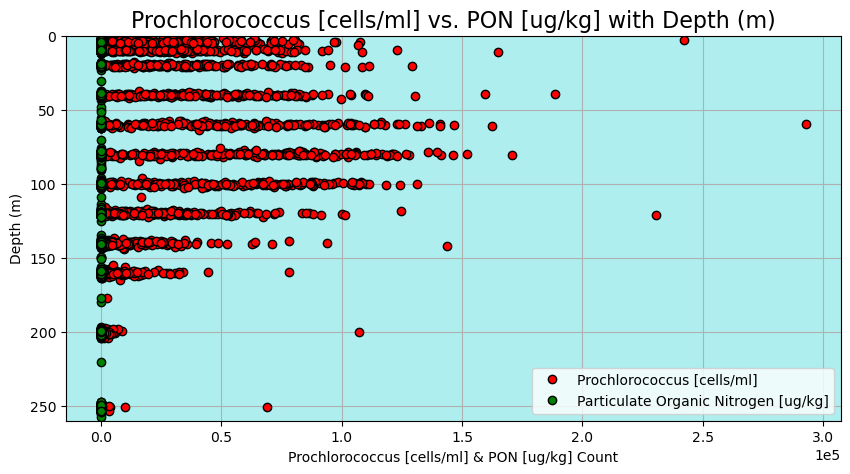

In [28]:
fig,axs = plt.subplots(figsize = (10,5))
axs.plot(pro_array_pro, pro_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'red', linestyle = 'None', label = 'Prochlorococcus [cells/ml]')
axs.plot(pro_array_pon, pon_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'green', linestyle = 'None', label = 'Particulate Organic Nitrogen [ug/kg]')
axs.invert_yaxis()
axs.grid()
axs.set_ylim(260,0)
axs.set_xlabel('Prochlorococcus [cells/ml] & PON [ug/kg] Count', fontsize = 10)
axs.set_ylabel('Depth (m)', fontsize = 10)
axs.set_facecolor('paleturquoise')
axs.set_title('Prochlorococcus [cells/ml] vs. PON [ug/kg] with Depth (m)', fontsize = 16)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
plt.show()

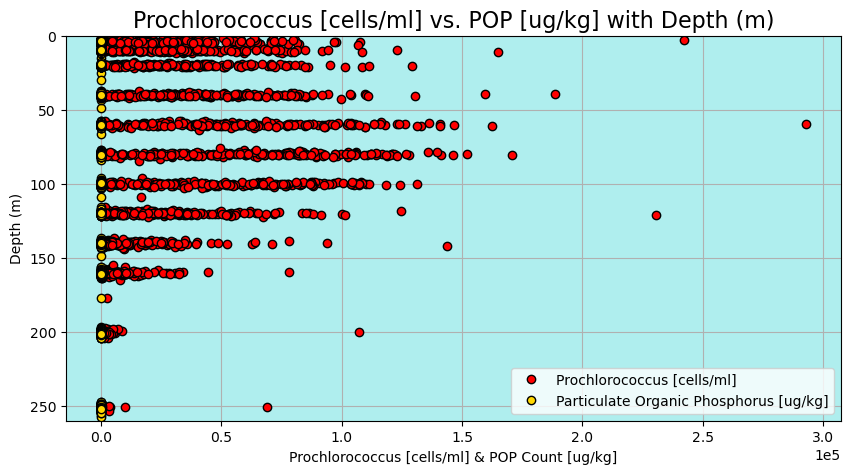

In [29]:
fig,axs = plt.subplots(figsize = (10,5))
axs.plot(pro_array_pro, pro_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'red', linestyle = 'None', label = 'Prochlorococcus [cells/ml]')
axs.plot(pro_array_pop, pop_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'gold', linestyle = 'None', label = 'Particulate Organic Phosphorus [ug/kg]')
axs.invert_yaxis()
axs.grid()
axs.set_ylim(260,0)
axs.set_xlabel('Prochlorococcus [cells/ml] & POP Count [ug/kg]', fontsize = 10)
axs.set_ylabel('Depth (m)', fontsize = 10)
axs.set_facecolor('paleturquoise')
axs.set_title('Prochlorococcus [cells/ml] vs. POP [ug/kg] with Depth (m)', fontsize = 16)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
plt.show()

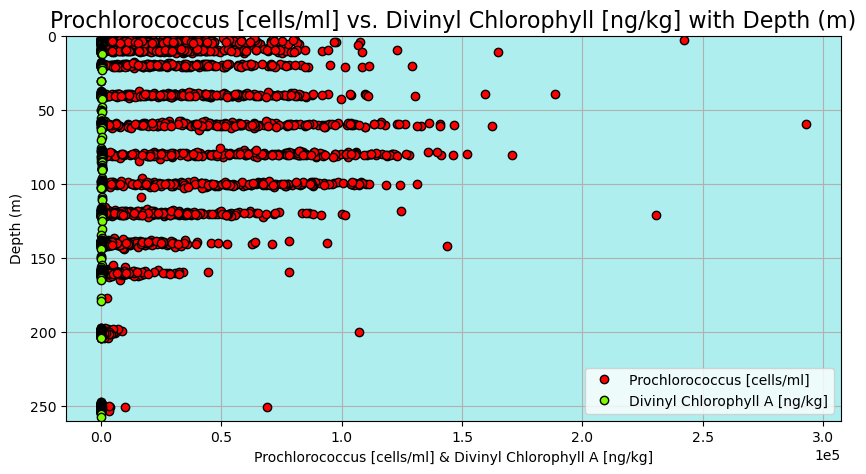

In [30]:
chl_a_array_depth = chl_a_df.depth.values
chl_a_array_pig = chl_a_df.pigment14.values

fig,axs = plt.subplots(figsize = (10,5))
axs.plot(pro_array_pro, pro_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'red', linestyle = 'None', label = 'Prochlorococcus [cells/ml]')
axs.plot(chl_a_array_pig, chl_a_array_depth, color = 'k', lw = 2, marker = 'o', markerfacecolor = 'lawngreen', linestyle = 'None', label = 'Divinyl Chlorophyll A [ng/kg]')
axs.invert_yaxis()
axs.grid()
axs.set_ylim(260,0)
axs.set_xlabel('Prochlorococcus [cells/ml] & Divinyl Chlorophyll A [ng/kg]', fontsize = 10)
axs.set_ylabel('Depth (m)', fontsize = 10)
axs.set_facecolor('paleturquoise')
axs.set_title('Prochlorococcus [cells/ml] vs. Divinyl Chlorophyll [ng/kg] with Depth (m)', fontsize = 16)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
plt.show()